In [1]:
import pandas as pd

In [2]:
## librairie de visualisation
import matplotlib.pyplot as plt
## same window graph
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
## offline pour l'exportation des graphes en html, faire un render en local
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
import folium
from folium import plugins

In [3]:
## changement de la taille des graphes
plt.rcParams['figure.figsize'] = 10,12

In [4]:
## désactiver les warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('owid-covid-data.csv')
df.assign(dated = pd.to_datetime(df["date"]))
df

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
182691      ZWE    Africa     Zimbabwe  2022-04-26     247667.0       69.0   
182692      ZWE    Africa     Zimbabwe  2022-04-27     247729.0       62.0   
182693      ZWE    Africa     Zimbabwe  2022-04-28     247784.0       55.0   
182694      ZWE    Africa     Zimbabwe  2022-04-29     247842.0       58.0   
182695      ZWE    Africa     Zimbabwe  2022-04-30          NaN        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
182691              52.857        5469.0         1.0                0.714   
182692              56.143        5469.0         0.0                0.429   
182693              57.286        5469.0         0.0                0.286   
182694              50.571        5469.0         0.0                0.143   
182695                 NaN           NaN         NaN                  NaN   

        ...  female_smokers  male_smokers  handwashing_facilities  \
0       ...             NaN           NaN                  37.746   
1       ...             NaN           NaN                  37.746   
2       ...             NaN           NaN                  37.746   
3       ...             NaN           NaN                  37.746   
4       ...             NaN           NaN                  37.746   
...     ...             ...           ...                     ...   
182691  ...             1.6          30.7                  36.791   
182692  ...             1.6          30.7                  36.791   
182693  ...             1.6          30.7                  36.791   
182694  ...             1.6          30.7                  36.791   
182695  ...             1.6          30.7                  36.791   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                              0.5            64.83                    0.511   
1                              0.5            64.83                    0.511   
2                              0.5            64.83                    0.511   
3                              0.5            64.83                    0.511   
4                              0.5            64.83                    0.511   
...                            ...              ...                      ...   
182691                         1.7            61.49                    0.571   
182692                         1.7            61.49                    0.571   
182693                         1.7            61.49                    0.571   
182694                         1.7            61.49                    0.571   
182695                         1.7            61.49                    0.571   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN   

In [6]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')
print(df['date'].max())

2022-04-30 00:00:00


In [7]:
## si ça marche pas remettre encoding à utf-8/latin-1
world_coord = pd.read_csv('countries.csv', sep = ',', encoding='latin-1')

In [8]:
world_coord

country   latitude   longitude               name
0        AF  33.939110   67.709953        Afghanistan
1        AL  41.153332   20.168331            Albania
2        DZ  28.033886    1.659626            Algeria
3        AD  42.546245    1.601554            Andorra
4        AO -11.202692   17.873887             Angola
..      ...        ...         ...                ...
233      WF -13.768752 -177.156097  Wallis and Futuna
234      EH  24.215527  -12.885834     Western Sahara
235      YE  15.552727   48.516388              Yemen
236      ZM -13.133897   27.849332             Zambia
237      ZW -19.015438   29.154857           Zimbabwe

[238 rows x 4 columns]

In [9]:
df_final = pd.read_csv('covid_pays_v1.csv')
df_final

iso_code continent           location       date  total_cases  \
0         AFG      Asia        Afghanistan  4/29/2022       178873   
1    OWID_AFR       NaN             Africa  4/29/2022     11666900   
2         ALB    Europe            Albania  4/29/2022       275055   
3         DZA    Africa            Algeria  4/29/2022       265779   
4         AND    Europe            Andorra  4/29/2022        41349   
..        ...       ...                ...        ...          ...   
223       WLF   Oceania  Wallis and Futuna  4/29/2022          454   
224  OWID_WRL       NaN              World  4/29/2022    513085948   
225       YEM      Asia              Yemen  4/29/2022        11818   
226       ZMB    Africa             Zambia  4/29/2022       319594   
227       ZWE    Africa           Zimbabwe  4/29/2022       247842   

     total_deaths    population  
0          7683.0  3.983543e+07  
1        252878.0  1.373486e+09  
2          3496.0  2.872934e+06  
3          6875.0  4.461663e+07  
4           153.0  7.735400e+04  
..            ...           ...  
223           7.0  1.109400e+04  
224     6234079.0  7.874966e+09  
225        2149.0  3.049064e+07  
226        3976.0  1.892066e+07  
227        5469.0  1.509217e+07  

[228 rows x 7 columns]

In [10]:
##df_final.style.background_gradient(cmap='Reds')
df_full = pd.merge(world_coord, df_final, left_on='name', right_on='location')
df_full

country   latitude   longitude               name iso_code continent  \
0        AF  33.939110   67.709953        Afghanistan      AFG      Asia   
1        AL  41.153332   20.168331            Albania      ALB    Europe   
2        DZ  28.033886    1.659626            Algeria      DZA    Africa   
3        AD  42.546245    1.601554            Andorra      AND    Europe   
4        AO -11.202692   17.873887             Angola      AGO    Africa   
..      ...        ...         ...                ...      ...       ...   
192      VN  14.058324  108.277199            Vietnam      VNM      Asia   
193      WF -13.768752 -177.156097  Wallis and Futuna      WLF   Oceania   
194      YE  15.552727   48.516388              Yemen      YEM      Asia   
195      ZM -13.133897   27.849332             Zambia      ZMB    Africa   
196      ZW -19.015438   29.154857           Zimbabwe      ZWE    Africa   

              location       date  total_cases  total_deaths  population  
0          Afghanistan  4/29/2022       178873        7683.0  39835428.0  
1              Albania  4/29/2022       275055        3496.0   2872934.0  
2              Algeria  4/29/2022       265779        6875.0  44616626.0  
3              Andorra  4/29/2022        41349         153.0     77354.0  
4               Angola  4/29/2022        99287        1900.0  33933611.0  
..                 ...        ...          ...           ...         ...  
192            Vietnam  4/29/2022     10644700       43038.0  98168829.0  
193  Wallis and Futuna  4/29/2022          454           7.0     11094.0  
194              Yemen  4/29/2022        11818        2149.0  30490639.0  
195             Zambia  4/29/2022       319594        3976.0  18920657.0  
196           Zimbabwe  4/29/2022       247842        5469.0  15092171.0  

[197 rows x 11 columns]

In [11]:
##df_full = world_coord.set_index('name').join(df_final.set_index('name'))

In [12]:
df_full

country   latitude   longitude               name iso_code continent  \
0        AF  33.939110   67.709953        Afghanistan      AFG      Asia   
1        AL  41.153332   20.168331            Albania      ALB    Europe   
2        DZ  28.033886    1.659626            Algeria      DZA    Africa   
3        AD  42.546245    1.601554            Andorra      AND    Europe   
4        AO -11.202692   17.873887             Angola      AGO    Africa   
..      ...        ...         ...                ...      ...       ...   
192      VN  14.058324  108.277199            Vietnam      VNM      Asia   
193      WF -13.768752 -177.156097  Wallis and Futuna      WLF   Oceania   
194      YE  15.552727   48.516388              Yemen      YEM      Asia   
195      ZM -13.133897   27.849332             Zambia      ZMB    Africa   
196      ZW -19.015438   29.154857           Zimbabwe      ZWE    Africa   

              location       date  total_cases  total_deaths  population  
0          Afghanistan  4/29/2022       178873        7683.0  39835428.0  
1              Albania  4/29/2022       275055        3496.0   2872934.0  
2              Algeria  4/29/2022       265779        6875.0  44616626.0  
3              Andorra  4/29/2022        41349         153.0     77354.0  
4               Angola  4/29/2022        99287        1900.0  33933611.0  
..                 ...        ...          ...           ...         ...  
192            Vietnam  4/29/2022     10644700       43038.0  98168829.0  
193  Wallis and Futuna  4/29/2022          454           7.0     11094.0  
194              Yemen  4/29/2022        11818        2149.0  30490639.0  
195             Zambia  4/29/2022       319594        3976.0  18920657.0  
196           Zimbabwe  4/29/2022       247842        5469.0  15092171.0  

[197 rows x 11 columns]

df_full['iso_code'].isnull().values.any() -> renvoie True/False si il existe ou pas des cases NaN pour la colonne iso_code dans tout le dataframe

In [13]:
df_full['iso_code'].isnull().values.any()

False

df_full['iso_code'].isnull().sum() -> affiche le nombre de case contenant NaN dans la colonne iso_code

df_full[df_full['iso_code'].isna()] -> affiche les valeurs ou iso_code = NaN not a number

In [14]:
## df_full_rectified = df_full.dropna(subset=['iso_code']) supprimer les cases avec iso_code en NaN

In [15]:
##df_full_rectified[df_full_rectified['iso_code'].isna()]

In [16]:
filtre_pays = df_full["iso_code"] == 'FRA'
df_filtre = df_full[filtre_pays]
df_filtre

country   latitude  longitude    name iso_code continent location  \
61      FR  46.227638   2.213749  France      FRA    Europe   France   

         date  total_cases  total_deaths  population  
61  4/29/2022     28649885      145938.0  67422000.0

In [39]:
# folium est une bibliothèque qui utilise leaflet pour une map interactive
map = folium.Map(location = [30, 30], zoom_start=2, tiles='Stamenterrain')

for lat, lon, value, nom in zip(df_full['latitude'], df_full['longitude'], df_full['total_cases'], df_full['iso_code']):
    folium.CircleMarker([lat, lon], radius=value*0.0000008, popup = ('<strong>State</strong>: ' + str(nom).capitalize() + '<br><strong>Total Cases</strong>: ' + str(value) +' '), color='red', fill_color='red', fill_opacity=0.3).add_to(map)
map
##plotly.offline.plot(map,filename='test.html',config={'displayModeBar': False}) doesn't work -> stackoverflow

## retirer le commentaire pour enregistrer la map dans un fichier html, save crée le fichier folium_map.html // remove the line below to save map in html file

##map.save('Created_by_Machine_Learning/folium_map.html')

## si la map ne s'affiche pas sur git, utiliser nbviwewer.org

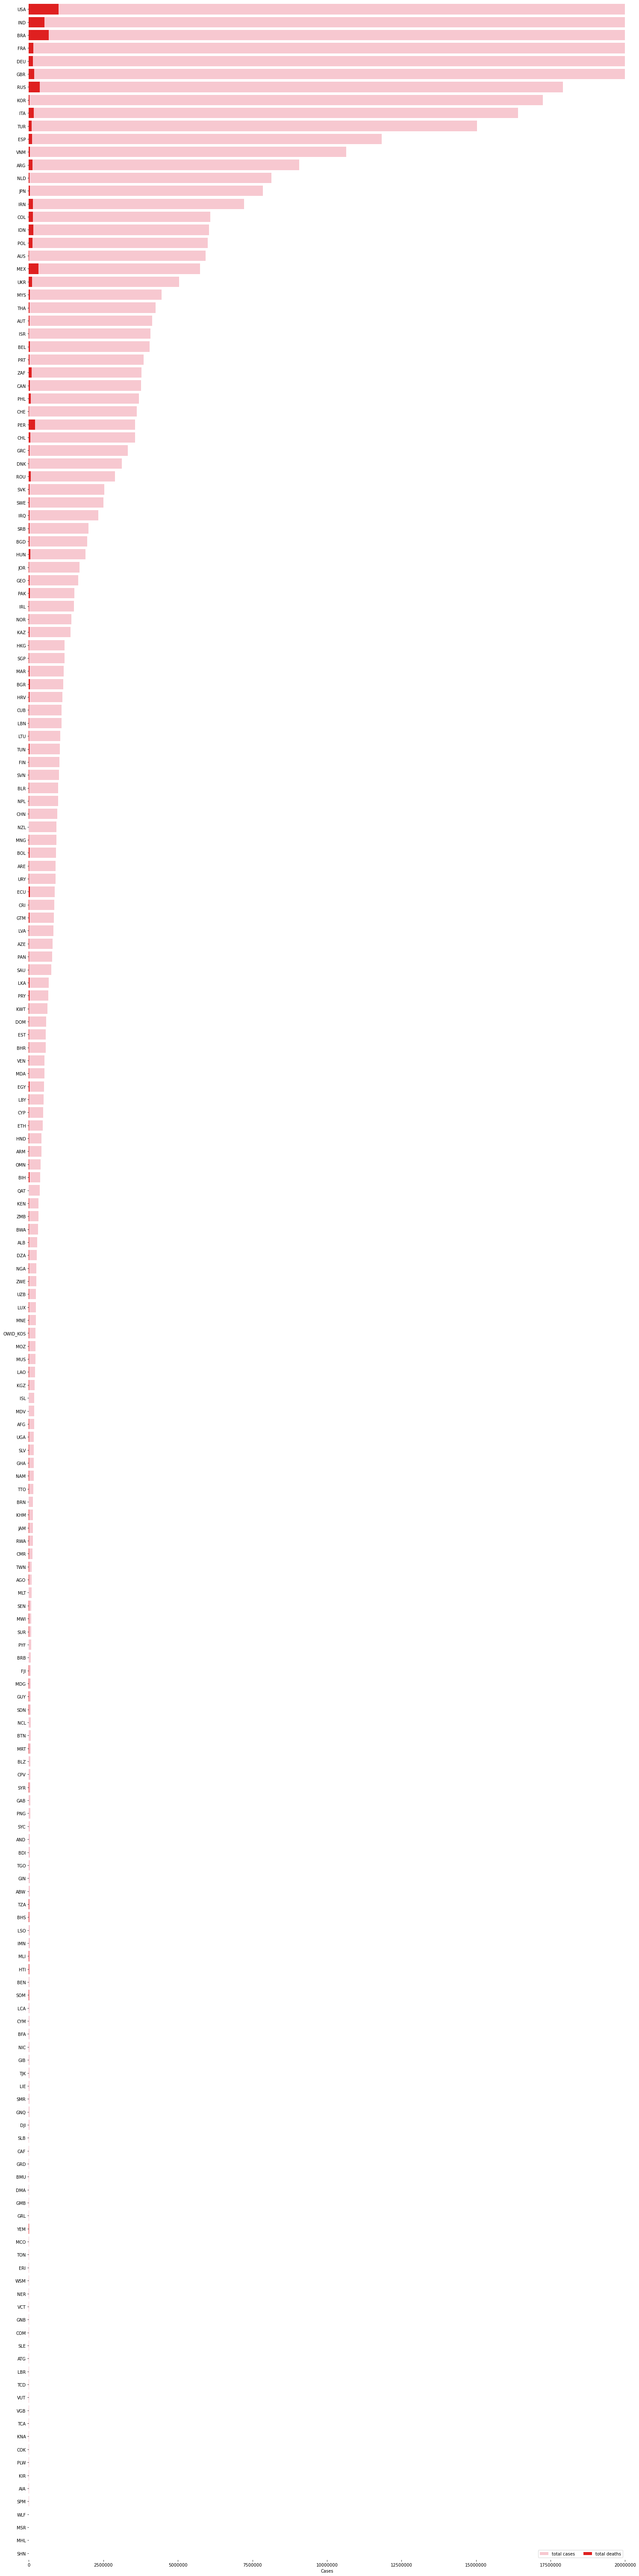

In [18]:
f, ax = plt.subplots(figsize=(25, 110))
data = df_full[['iso_code','total_cases','total_deaths']]
data.sort_values('total_cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns_plot = sns.barplot(x="total_cases", y="iso_code", data=data,label="total cases", color="pink")
sns.set_color_codes("muted")
sns.barplot(x="total_deaths", y="iso_code", data=data, label="total deaths", color="red")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 20000000), ylabel="",xlabel="Cases")
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
sns.despine(left=True, bottom=True)
fig = sns_plot.get_figure()
fig.savefig("Created_by_Machine_Learning/seaborn_cases_n_deaths.png")

barplot affichant le nombre de cas de covid(pink/rose) ainsi que le nombre de décès(red) au dessus

In [19]:
confirmed = df.groupby('date').sum()['new_cases'].reset_index()
confirmed = confirmed[:-1]
confirmed

date  new_cases
0   2020-01-01        0.0
1   2020-01-02        0.0
2   2020-01-03        0.0
3   2020-01-04        0.0
4   2020-01-05        0.0
..         ...        ...
845 2022-04-25  2511723.0
846 2022-04-26  2882915.0
847 2022-04-27  3866176.0
848 2022-04-28  3179903.0
849 2022-04-29  2757601.0

[850 rows x 2 columns]

In [20]:
deaths = df.groupby('date').sum()['new_vaccinations'].reset_index()
deaths = deaths[:-1] ## delete last row contains null value 
deaths['date']

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
845   2022-04-25
846   2022-04-26
847   2022-04-27
848   2022-04-28
849   2022-04-29
Name: date, Length: 850, dtype: datetime64[ns]

In [21]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['new_cases'], mode='lines+markers', name='Confirmed',line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['new_vaccinations'], mode='lines', name='vaccinations', line=dict(color='blue', width=1)))
fig.update_layout(title='Worldwide COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()
## pour exporter en div, assez géant le div 
##plotly.offline.plot(fig, include_plotlyjs=False, output_type='div')


In [22]:
from prophet import Prophet

utilisation de prophet développé par facebook data science team, pour générer des données vers une semaine/mois/année au futur, avec un intervalle de prédiction de 95% en créant un modèle de base sans ajustement des paramètres liés à la saisonnalité et des régresseurs supplémentaires.

In [23]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

ds          y
845 2022-04-25  2511723.0
846 2022-04-26  2882915.0
847 2022-04-27  3866176.0
848 2022-04-28  3179903.0
849 2022-04-29  2757601.0

In [24]:
m = Prophet(interval_width=0.95) 
m.fit(confirmed) 
future = m.make_future_dataframe(periods=365, freq='D') 
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
1210 2023-04-25
1211 2023-04-26
1212 2023-04-27
1213 2023-04-28
1214 2023-04-29

la méthode predict attribue pour chaque ligne une valeur prédite qui est yhat, et deux colonnes qui sont (yhat_lower et yhat_upper) qui sont un intervalles d'incertitudes autour de yhat

In [25]:
#predicting the future with date, and upper and lower limit of y value
forecast_confirmed = m.predict(future)
forecast_confirmed[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1210 2023-04-25  1.075360e+07  4.482856e+06  1.692442e+07
1211 2023-04-26  1.102894e+07  4.760296e+06  1.730402e+07
1212 2023-04-27  1.110020e+07  4.376879e+06  1.716137e+07
1213 2023-04-28  1.109988e+07  4.746137e+06  1.736538e+07
1214 2023-04-29  1.067001e+07  4.082257e+06  1.666024e+07

 - Le modèle de Facebook Prophet est un modèle additionnant 3 éléments: la tendance, la saisonnalité et l’effet des vacances / événements, plus du bruit: 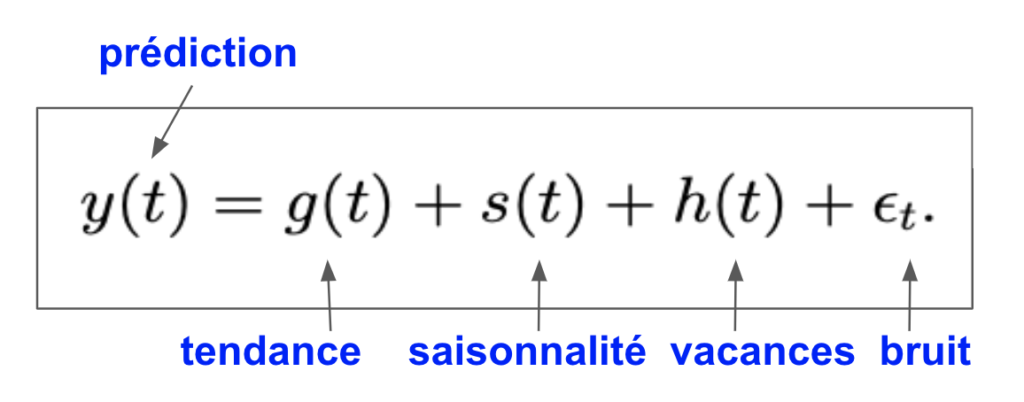

 - La tendance est modélisée par défaut de façon linéaire continue par morceaux. Les points de changement de la tendance (changepoints dans l’API Prophet) sont automatiquement détectés mais peuvent aussi être spécifiés de façon explicite par l’analyste.

 - L’api est semblable à celle de scikit-learn avec l’utilisation d’une fonction fit() lors de l’entrainement du modèle et predict() pour prédire sur des données futures

 - Sources : https://blog.engineering.publicissapient.fr/2020/04/01/lanalyse-de-series-temporelles-avec-prophet-et-deepar/

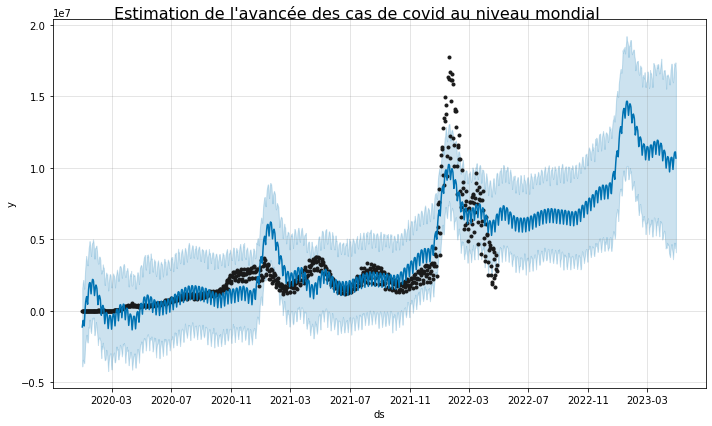

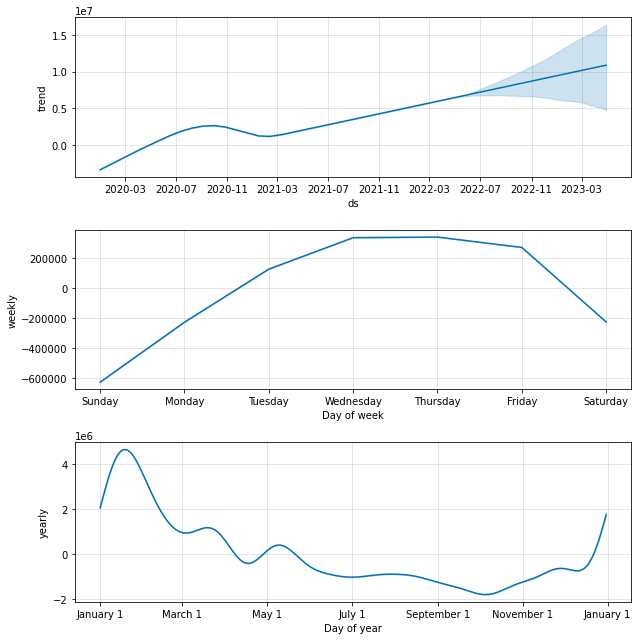

In [26]:
confirmed_forecast_plot = m.plot(forecast_confirmed)
m.plot_components(forecast_confirmed).savefig('seasonality_confirmed.png')
fig = confirmed_forecast_plot
fig.suptitle("Estimation de l'avancée des cas de covid au niveau mondial", fontsize=16)
fig.savefig('Created_by_Machine_Learning/prophetplot.svg')
## plotly.offline.plot(m, include_plotlyjs=False, output_type='div')

variation annuel, journalière, mensuelle des nouveaux cas de covid, ainsi que l'estimation vers le futur(1 an) de son avancé au niveau mondial. (vaccination non prise en compte dans l'estimation)

In [27]:
type(confirmed_forecast_plot)

matplotlib.figure.Figure

In [28]:
fig = confirmed_forecast_plot
fig.suptitle("Estimation de l'avancée des cas de covid au niveau mondial", fontsize=16)
fig
fig.savefig('Created_by_Machine_Learning/prophetplot.svg')

In [29]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=365, freq='D')
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
1210 2023-04-25
1211 2023-04-26
1212 2023-04-27
1213 2023-04-28
1214 2023-04-29

In [30]:
forecast_deaths = m.predict(future)
forecast_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1210 2023-04-25 -7.820414e+07 -2.382544e+08  8.045231e+07
1211 2023-04-26 -7.544414e+07 -2.420000e+08  9.594093e+07
1212 2023-04-27 -7.554192e+07 -2.421392e+08  9.475381e+07
1213 2023-04-28 -7.538560e+07 -2.394626e+08  8.949986e+07
1214 2023-04-29 -8.438020e+07 -2.562183e+08  8.216825e+07

la méthode predict attribue pour chaque ligne une valeur prédite qui est yhat, et deux colonnes qui sont (yhat_lower et yhat_upper) qui sont un intervalles d'incertitudes autour de yhat

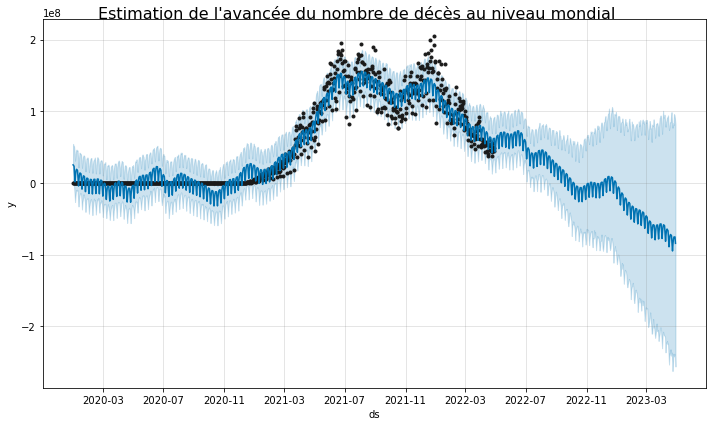

In [31]:
deaths_forecast_plot = m.plot(forecast_deaths)
type(deaths_forecast_plot)
fig_death = deaths_forecast_plot
fig_death.suptitle("Estimation de l'avancée du nombre de décès au niveau mondial", fontsize=16)
fig_death.savefig('Created_by_Machine_Learning/prophet_deaths.svg')

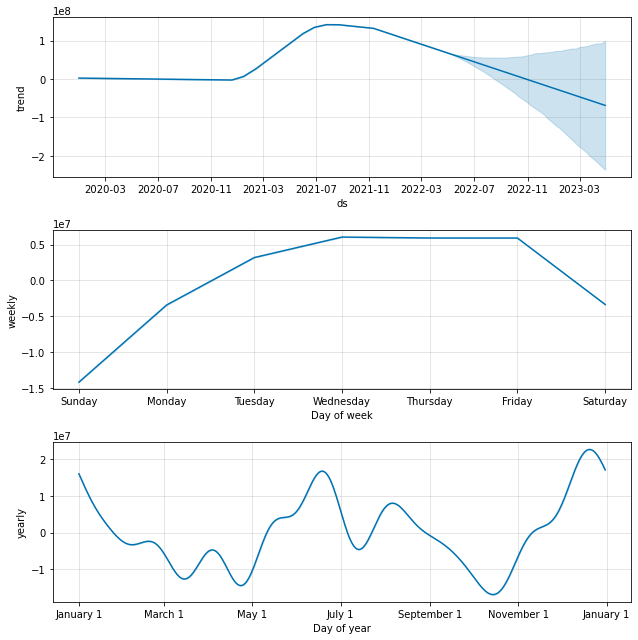

In [32]:
deaths_forecast_plot = m.plot_components(forecast_deaths)

variation annuel, journalière, mensuelle des décès de covid, ainsi que l'estimation vers le futur(1 an) de son avancé au niveau mondial. (vaccination non prise en compte dans l'estimation)

conclusion de l'estimation, augmentation des cas de covids dans le monde mais le nombre de décès diminue

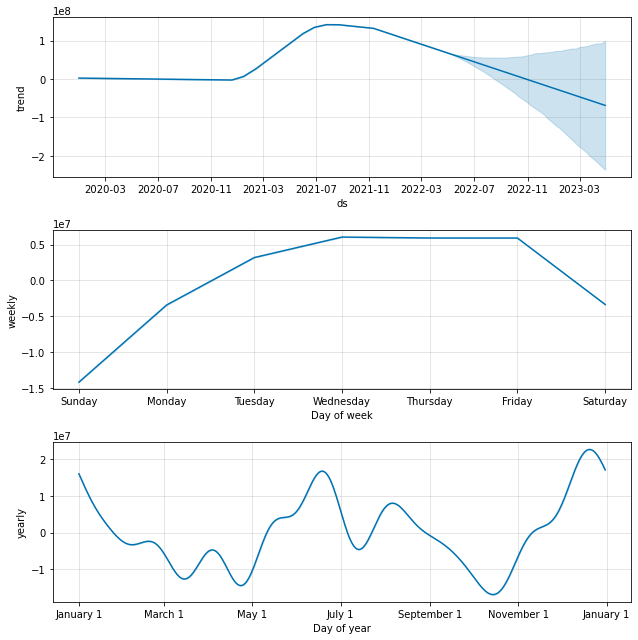

In [33]:
deaths_forecast_plot

In [34]:
fig_death = deaths_forecast_plot
fig_death
fig.savefig('Created_by_Machine_Learning/seasonality_deaths.svg')

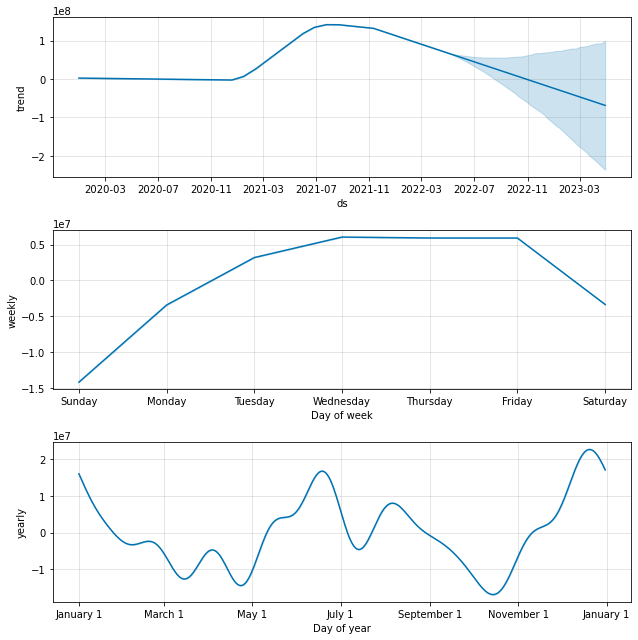

In [35]:
m.plot_components(forecast_deaths).savefig('Created_by_Machine_Learning/seasonality_deaths.png')

In [36]:
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(deaths)
##a = plot_yearly(m)
future_v1 = m.make_future_dataframe(periods=365, freq='D')
future_v1.tail()
future_v1['floor']=0

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
forecast_confirmed_v1 = m.predict(future_v1)
forecast_confirmed_v1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1210 2023-04-25 -7.314311e+07 -1.749765e+08  2.748955e+07
1211 2023-04-26 -7.027243e+07 -1.681595e+08  2.700286e+07
1212 2023-04-27 -7.046410e+07 -1.752536e+08  3.361507e+07
1213 2023-04-28 -7.057987e+07 -1.723418e+08  2.961261e+07
1214 2023-04-29 -7.999295e+07 -1.846586e+08  2.461310e+07

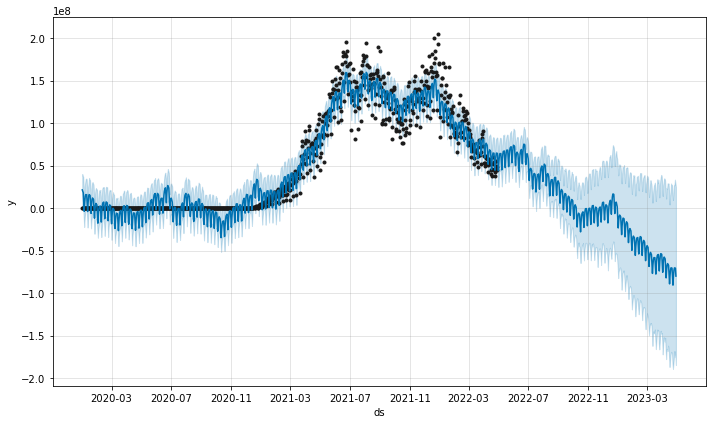

In [38]:
confirmed_forecast_v1 = m.plot(forecast_confirmed_v1)